In [1]:
library(rcompanion)
library(MASS)
library(mgcv)
library(fmsb)
library(classInt)
library(RColorBrewer)
library(rgdal)
library(ggplot2)
library(pvclust)
library(mclust)
library(cluster)
library(fpc)
library(spgwr)
library(maptools)
library(GWmodel)
library(e1071)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.
Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`
Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 
Package 'mclust' version 5.4.2
Type 'citation("mclust")' for citing this R package in publications.

Attaching package: ‘mclust’

The following object is mask

In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_wo_FIA.csv', DATA))
head(data)

lon,lat,etopo1,beetleAcres,host,forest,mStdAge,density,vcc,mfri,⋯,Tmin,winterMin,summerTmean,Pmean,summerP1,minT,JanMin,TOctSep,Jan20,PcumOctSep
-124.1712,40.22942,365.1772,0.80,1,1,25.50000,58050.83,1,2,⋯,3.799283,-1.050936,13.39157,147.6052,24.63396,-1.142272,0.77218069,10.28896,0,3588.627
-124.0860,40.42007,493.0852,0.80,0,1,42.46217,52809.04,1,2,⋯,3.858750,-1.872970,14.15700,136.2772,25.59386,-1.986082,-0.02538966,10.65948,0,3310.186
-123.9379,40.25447,487.5240,0.80,1,1,169.82977,54385.98,1,2,⋯,3.853568,-2.322706,15.26891,131.7037,22.97331,-2.402099,-0.42077545,11.30121,0,3203.155
-123.9535,40.34353,350.6961,0.80,0,1,249.11995,47005.25,1,2,⋯,4.731104,-2.289419,15.96638,127.5623,21.96572,-2.376570,-0.38369531,12.05334,0,3101.846
-124.2945,42.21193,387.5008,2.10,1,1,102.39621,51167.16,3,2,⋯,3.569939,-1.609584,14.75741,144.9382,63.31930,-1.701227,0.26865842,10.65064,0,3508.975
-124.3114,42.30082,409.5534,331.05,1,1,83.12288,54697.57,3,2,⋯,2.772311,-1.861916,14.02822,145.8606,65.28476,-1.954968,0.04758294,9.89128,0,3531.298


In [3]:
dim(data)
colnames(data)

[1] 7636   50

[1] "lon"         "lat"         "etopo1"      "beetleAcres" "host"       
 [6] "forest"      "mStdAge"     "density"     "vcc"         "mfri"       
[11] "prs"         "pms"         "pls"         "GAP1"        "GAP2"       
[16] "GAP3"        "vpd"         "cwd"         "maxAugT"     "summerP0"   
[21] "Tmean"       "mi"          "Tvar"        "wd"          "AugTmean"   
[26] "OctTmin"     "AugMaxT"     "AugTmax"     "Acs"         "MarMin"     
[31] "ddAugJun"    "ddAugJul"    "JanTmin"     "PPT"         "summerP2"   
[36] "TMarAug"     "Mar20"       "fallTmean"   "MarTmin"     "maxT"       
[41] "Tmin"        "winterMin"   "summerTmean" "Pmean"       "summerP1"   
[46] "minT"        "JanMin"      "TOctSep"     "Jan20"       "PcumOctSep"

In [4]:
drop <- c('summerP1')
data <- data[, -which(names(data) %in% drop)]
mod <- lm(beetleAcres^0.05 ~ ., data=data)

In [5]:
summary(mod)


Call:
lm(formula = beetleAcres^0.05 ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43787 -0.07011  0.00628  0.07382  0.45600 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.816e-01  1.915e-01   1.471 0.141421    
lon         -2.676e-03  1.370e-03  -1.953 0.050849 .  
lat          1.012e-02  2.532e-03   3.996 6.50e-05 ***
etopo1       1.222e-04  8.622e-06  14.174  < 2e-16 ***
host         4.914e-02  5.789e-03   8.489  < 2e-16 ***
forest       1.292e-02  2.743e-03   4.711 2.51e-06 ***
mStdAge      1.714e-05  2.640e-05   0.649 0.516172    
density      1.148e-06  9.085e-08  12.635  < 2e-16 ***
vcc          4.246e-03  1.422e-03   2.986 0.002840 ** 
mfri         2.821e-04  3.262e-04   0.865 0.387203    
prs         -1.013e-03  4.355e-04  -2.327 0.020014 *  
pms         -2.045e-04  4.725e-04  -0.433 0.665138    
pls         -1.608e-04  4.536e-04  -0.354 0.723006    
GAP1        -2.693e-02  4.144e-03  -6.500 8.56e-11 ***
G

In [6]:
mod.r <- step(mod, trace=0)

In [7]:
summary(mod.r)


Call:
lm(formula = beetleAcres^0.05 ~ lon + lat + etopo1 + host + forest + 
    density + vcc + prs + GAP1 + GAP3 + vpd + cwd + maxAugT + 
    summerP0 + Tmean + mi + Tvar + wd + AugTmean + OctTmin + 
    AugMaxT + AugTmax + Acs + MarMin + ddAugJun + ddAugJul + 
    JanTmin + PPT + TMarAug + Mar20 + fallTmean + MarTmin + maxT + 
    Tmin + winterMin + summerTmean + Pmean + minT + JanMin + 
    TOctSep + PcumOctSep, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43982 -0.06952  0.00631  0.07425  0.45296 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.999e-01  1.781e-01   1.684 0.092259 .  
lon         -2.585e-03  1.292e-03  -2.001 0.045395 *  
lat          1.016e-02  2.499e-03   4.064 4.88e-05 ***
etopo1       1.220e-04  8.406e-06  14.510  < 2e-16 ***
host         4.891e-02  5.784e-03   8.457  < 2e-16 ***
forest       1.289e-02  2.738e-03   4.709 2.53e-06 ***
density      1.151e-06  9.061e-08  12.702  < 2e-16 ***
vcc     

In [18]:
resids <- residuals(mod.r)
colours <- brewer.pal(4,"Set1")

In [19]:
xy <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_xy.csv', DATA))

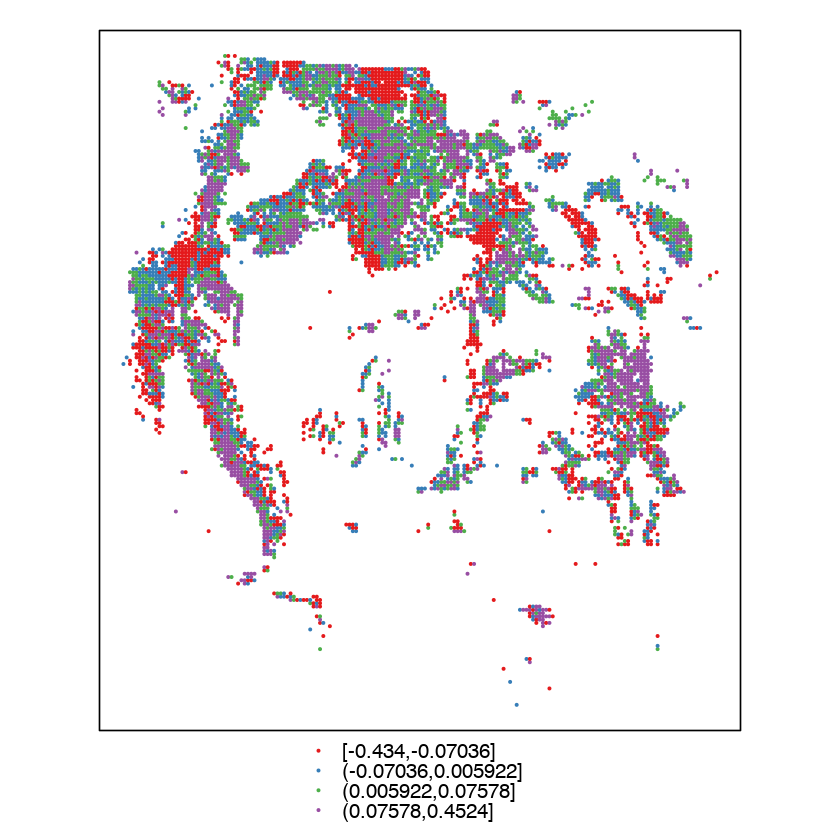

In [20]:
map.resids <- SpatialPointsDataFrame(data=data.frame(resids), coords=cbind(xy$x,xy$y)) 
spplot(map.resids, cuts=quantile(resids), col.regions=colours, cex=0.3) 

In [82]:
ptm <- proc.time()
GWRbandwidth <- gwr.sel(beetleAcres ~ mStdAge+density+vcc+mfri+Tmean+PcumOctSep+Pmean+PPT+
                        AugTmean+Tvar+JanTmin+ddAugJul, data=data, coords=cbind(xy$x,xy$y), adapt=T)
proc.time() - ptm

In [15]:
ptm <- proc.time()
gwr.model <- gwr(beetleAcres ~ summerP2_sq+Tmean+TOctSep+summerP1_sq+summerP0_sq+PcumOctSep+PcumOctSep_sq+
                 Pmean_sq+Pmean, data=data, coords=cbind(xy$x, xy$y), adapt=GWRbandwidth, 
                hatmatrix=TRUE, se.fit=TRUE)
proc.time() - ptm

     user    system   elapsed 
10013.888  4314.007 16521.433 

In [16]:
results <- as.data.frame(gwr.model$SDF)
head(results)

sum.w,X.Intercept.,summerP2_sq,Tmean,TOctSep,summerP1_sq,summerP0_sq,PcumOctSep,PcumOctSep_sq,Pmean_sq,⋯,TOctSep_se_EDF,summerP1_sq_se_EDF,summerP0_sq_se_EDF,PcumOctSep_se_EDF,PcumOctSep_sq_se_EDF,Pmean_sq_se_EDF,Pmean_se_EDF,pred.se.1,coord.x,coord.y
57.47512,3.9964468,23.46878,-80.01684,80.02111,-18.02923,-2.535565,-20.678332,24.0573985,-24.5412443,⋯,36.75781,215.1803,232.7864,9.989442,8.718167,8.837245,10.03721,0.05652642,-990000,-460000
42.58059,2.6257284,937.60035,-161.86008,161.86811,-460.34260,-476.801824,-46.023314,47.7901468,-48.6485839,⋯,68.62286,280.8542,302.5415,16.905796,14.522493,14.749811,16.99566,0.03109020,-980000,-440000
49.00339,3.2147041,915.93797,-151.24886,151.23514,-452.72337,-462.435120,-44.794965,45.0554905,-45.5738327,⋯,72.85838,298.3465,321.0126,14.408501,12.074659,12.179444,14.37676,0.02991061,-970000,-460000
40.11555,2.0618060,1449.07803,-242.11306,242.09392,-711.39053,-738.561310,-63.317833,62.4641527,-63.3507144,⋯,95.43360,351.3683,377.2435,18.664308,15.755385,15.947935,18.67654,0.03368436,-970000,-450000
35.60125,0.4526729,253.51441,-27.95298,27.92605,-119.84089,-134.810773,-8.332426,10.0624894,-9.9320580,⋯,31.31838,425.4733,464.1322,49.675655,44.308870,44.382241,49.46677,0.03462302,-970000,-240000
30.32334,-0.2244473,698.43929,-12.90306,12.84216,-336.26260,-364.624783,11.012141,0.7557612,-0.3747616,⋯,38.87565,488.8493,533.6899,66.576086,59.500555,59.593295,66.30973,0.04018992,-970000,-230000


In [17]:
colnames(results)

[1] "sum.w"                "X.Intercept."         "summerP2_sq"         
 [4] "Tmean"                "TOctSep"              "summerP1_sq"         
 [7] "summerP0_sq"          "PcumOctSep"           "PcumOctSep_sq"       
[10] "Pmean_sq"             "Pmean"                "X.Intercept._se"     
[13] "summerP2_sq_se"       "Tmean_se"             "TOctSep_se"          
[16] "summerP1_sq_se"       "summerP0_sq_se"       "PcumOctSep_se"       
[19] "PcumOctSep_sq_se"     "Pmean_sq_se"          "Pmean_se"            
[22] "gwr.e"                "pred"                 "pred.se"             
[25] "localR2"              "X.Intercept._se_EDF"  "summerP2_sq_se_EDF"  
[28] "Tmean_se_EDF"         "TOctSep_se_EDF"       "summerP1_sq_se_EDF"  
[31] "summerP0_sq_se_EDF"   "PcumOctSep_se_EDF"    "PcumOctSep_sq_se_EDF"
[34] "Pmean_sq_se_EDF"      "Pmean_se_EDF"         "pred.se.1"           
[37] "coord.x"              "coord.y"

In [21]:
vars <- c('summerP2_sq', 'Tmean', 'TOctSep', 'summerP1_sq', 'summerP0_sq', 'PcumOctSep', 
          'PcumOctSep_sq', 'Pmean_sq', 'Pmean')
coeffs <- results[, vars]

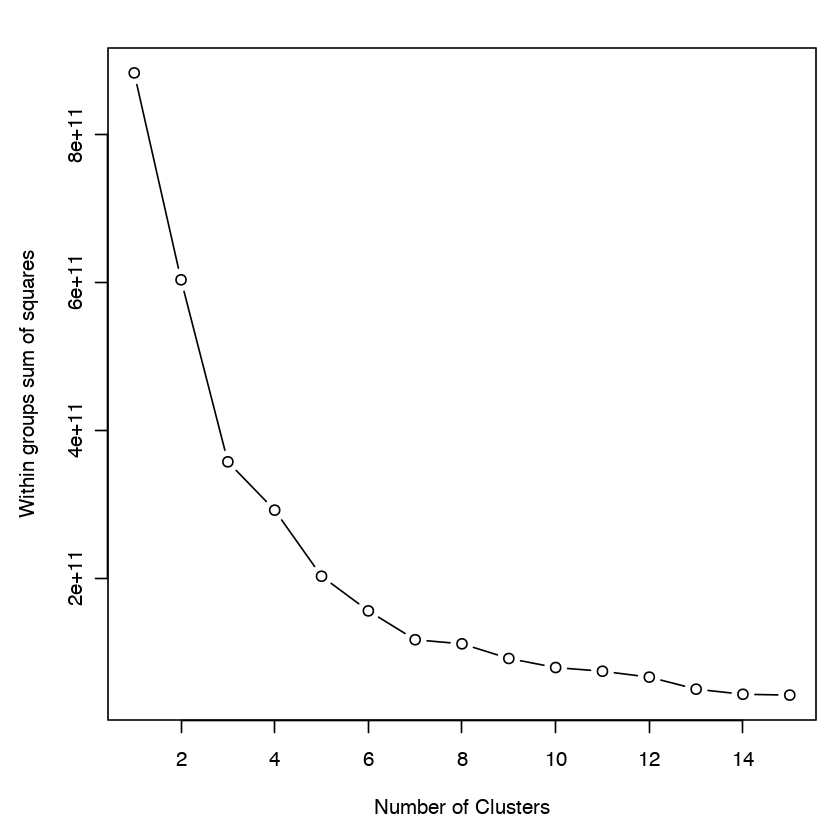

In [22]:
wss <- (nrow(coeffs)-1)*sum(apply(coeffs,2,var))
par(mfrow=c(1,1),mar=c(5,4.5,2,1))
for (i in 2:15) wss[i] <- sum(kmeans(coeffs, centers=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares") 

In [23]:
ncluster <- 3

In [24]:
fit <- kmeans(coeffs, ncluster)

In [25]:
nclr <- ncluster
plotclr <- brewer.pal(nclr,"Set1")

In [26]:
mpb10km_poly <- readOGR(dsn='/Users/dongmeichen/Documents/beetle/shp', 
                           layer='mpb10km')
mpb_projstr <- "+proj=laea +lon_0=-112.5 +lat_0=45 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
proj4string(mpb10km_poly) <- mpb_projstr
mpb10km_lines <- fortify(mpb10km_poly, region="SP_ID")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km"
with 17 features
It has 2 fields


Warning message in ReplProj4string(obj, CRS(value)):
“A new CRS was assigned to an object with an existing CRS:
+proj=laea +lat_0=45 +lon_0=-112.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0
without reprojecting.
For reprojection, use function spTransform”

In [27]:
data.gwr <- cbind(data, xy)

Warning message:
“Non Lab interpolation is deprecated”

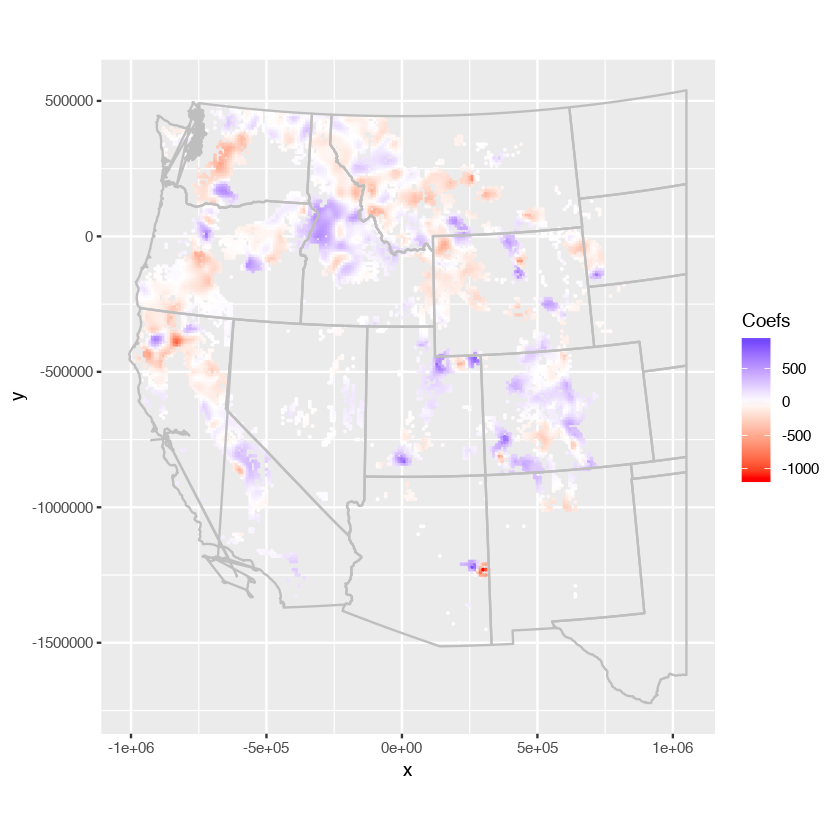

In [29]:
gwr.pt <- ggplot(data.gwr, aes(x=x,y=y))+geom_point(aes(colour=results$Tmean), size=0.05)+
  scale_colour_gradient2(low = "red", mid = "white", high = "blue", midpoint = 0, space = "rgb", 
                         na.value = "grey50", guide = "colourbar", guide_legend(title="Coefs"))
gwr.pt+geom_path(data=mpb10km_lines,aes(long, lat, group=id), colour="grey")+coord_equal()

In [30]:
plotvar <- fit$cluster
class <- classIntervals(plotvar, nclr, style="equal")
colcode <- findColours(class, plotclr)

Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

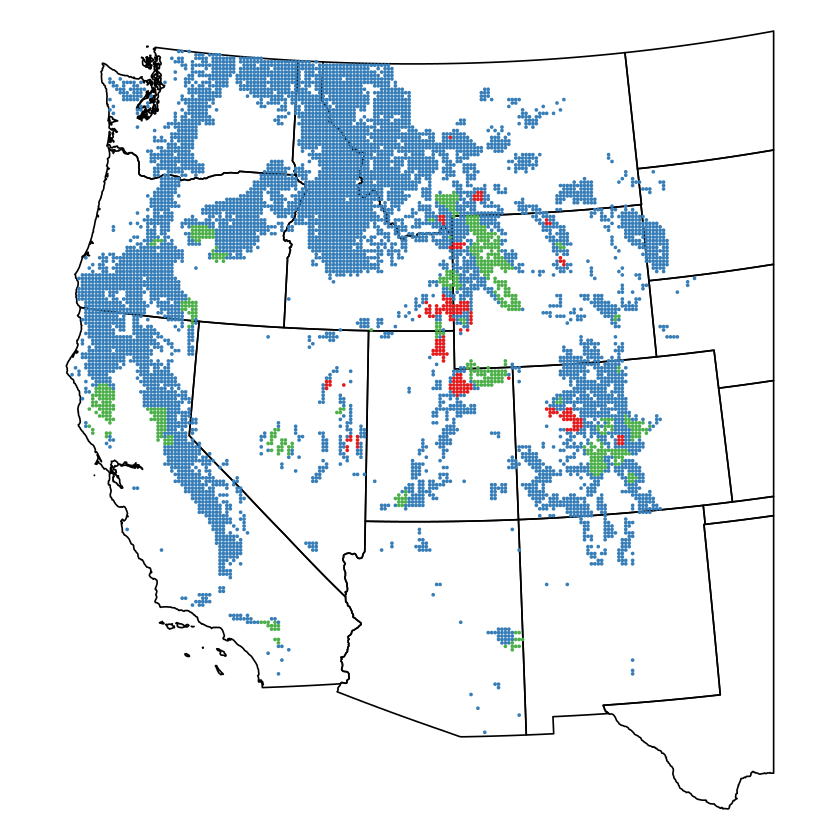

In [31]:
par(mfrow=c(1,1),mar=c(0,0,0,0))
plot(mpb10km_poly)
points(xy$x, xy$y, pch=16, col=colcode, cex=0.3)

In [40]:
coeffs.updated <- data.frame(coeffs, fit$cluster)

In [32]:
data.updated <- data.frame(data, fit$cluster)

In [41]:
head(coeffs.updated)

summerP2_sq,Tmean,TOctSep,summerP1_sq,summerP0_sq,PcumOctSep,PcumOctSep_sq,Pmean_sq,Pmean,fit.cluster
23.46878,-80.01684,80.02111,-18.02923,-2.535565,-20.678332,24.0573985,-24.5412443,20.864065,2
937.60035,-161.86008,161.86811,-460.34260,-476.801824,-46.023314,47.7901468,-48.6485839,46.372521,2
915.93797,-151.24886,151.23514,-452.72337,-462.435120,-44.794965,45.0554905,-45.5738327,44.737729,2
1449.07803,-242.11306,242.09392,-711.39053,-738.561310,-63.317833,62.4641527,-63.3507144,63.496304,2
253.51441,-27.95298,27.92605,-119.84089,-134.810773,-8.332426,10.0624894,-9.9320580,8.145057,2
698.43929,-12.90306,12.84216,-336.26260,-364.624783,11.012141,0.7557612,-0.3747616,-11.375578,2


In [54]:
library(grid)

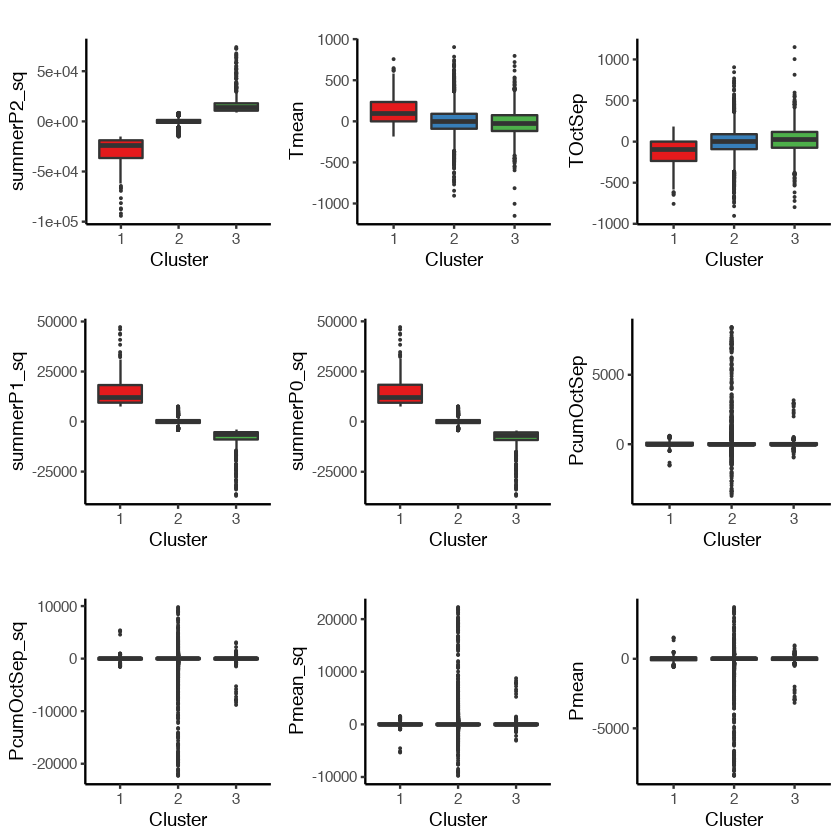

In [62]:
vplayout <- function(x, y) viewport(layout.pos.row = x, layout.pos.col = y)
n1 <- c(rep(1,3),rep(2,3),rep(3,3)); n2 <- rep(c(1,2,3),3) 
grid.newpage()
pushViewport(viewport(layout = grid.layout(3, 3)))
for(var in colnames(coeffs)){
    sdf <- coeffs.updated[, c(var, 'fit.cluster')]
    colnames(sdf)[1] <- 'var'
    g <- ggplot(sdf, aes(x=as.factor(fit.cluster), y=var, fill=as.factor(fit.cluster)))+
      scale_fill_manual(values = plotclr) +
      geom_boxplot(outlier.size = 0.05)+labs(title='', x="Cluster", y = var)+
      theme_classic() + theme(legend.position="none") 
    i <- which(colnames(coeffs)==var)
    print(g, vp = vplayout(n1[i], n2[i]))
}